In [340]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import debug


In [341]:
# Configure image
image = cv2.imread("../images/boards/yellow_black_up.jpeg")
image_size = (700,700)
image = cv2.resize(image,image_size)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#canny = cv2.Canny(gray, threshold1=500, threshold2=100) 

In [342]:
def _detect_edges(gray: np.ndarray) -> np.ndarray:
    if gray.dtype != np.uint8:
        gray = gray / gray.max() * 255
        gray = gray.astype(np.uint8)
    edges = cv2.Canny(gray,
                      90,
                      400,
                      3)
    return edges

In [343]:
canny = _detect_edges(gray)

Detect chessboard borders

In [344]:
lines = cv2.HoughLines(canny,rho = 1, theta = np.pi / 180, threshold = 100)

def polar_to_coor(lines):
    
    lines = lines.reshape(len(lines),2)
        
    origin_lines = lines[lines[:, 1].argsort()]
    
    coor_lines = []
    for line in origin_lines:
        rho,theta = line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 +(-b))
        y1 = int(y0 +(a))
        x2 = int(x0 -(-b))
        y2 = int(y0 -(a))   
        coor_lines.append(((x1,y1),(x2,y2)))
    
    return coor_lines
    
lines = np.array(polar_to_coor(lines))  

v_mask = np.array([any(value < 5 for _, value in row) for row in lines])
h_mask = np.array([any(value < 5 for value,_ in row) for row in lines])
# Use the mask to filter rows and create a new array
vertical_lines = lines[v_mask]
horizontal_lines = lines[h_mask]

#debug.lines(image, lines, size = 7)
print(vertical_lines)

line_diff = 20
margin_diff = 3

while(True):
    
    if(vertical_lines[])
    counter = counter + 1
    


[[[670   1]
  [670  -1]]

 [[524   1]
  [524  -1]]

 [[587   1]
  [587  -1]]

 [[597   1]
  [597  -1]]

 [[439   1]
  [439  -1]]

 [[290   1]
  [290  -1]]

 [[650   1]
  [650  -1]]

 [[365   1]
  [365  -1]]

 [[441   1]
  [441  -1]]

 [[449   1]
  [449  -1]]

 [[648   1]
  [648  -1]]

 [[667   1]
  [667  -1]]

 [[514   1]
  [514  -1]]

 [[ 60   1]
  [ 60  -1]]

 [[374   1]
  [374  -1]]

 [[297   1]
  [297  -1]]

 [[213   1]
  [213  -1]]

 [[301   6]
  [301   4]]

 [[294   6]
  [294   4]]

 [[ 62   2]
  [ 63   0]]

 [[226   4]
  [226   2]]

 [[140   3]
  [140   1]]

 [[ 79   2]
  [ 80   0]]

 [[149   3]
  [149   1]]

 [[217   4]
  [217   2]]

 [[438  -8]
  [438  -6]]

 [[363  -7]
  [363  -5]]

 [[130  -3]
  [130  -1]]

 [[512  -9]
  [512  -7]]

 [[210  -4]
  [210  -2]]]


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Detect chesboard corners

In [345]:
def line_intersection(lines):

    points =[]
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):

            line1 = lines[i]
            line2 = lines[j]
            xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
            ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

            def det(a, b):
                return a[0] * b[1] - a[1] * b[0]

            div = det(xdiff, ydiff)
            if div != 0:
                

                d = (det(*line1), det(*line2))
                x = det(d, xdiff) / div
                y = det(d, ydiff) / div
                points.append((x,y)) 
    return points

intersections = line_intersection(lines)

#debug.points(image,inter,color = (0,255,0),size = 10)
inters = np.array(intersections)
inters = inters[np.all((-100 <= inters) & (inters <= 800), axis=1)] # Delete point outside -100 and 800
sorted_intersections = inters[inters[:, 0].argsort()]

sorted_intersections

array([[-98., 356.],
       [-95., 350.],
       [-94., 348.],
       ...,
       [768., 491.],
       [778., 496.],
       [788., 501.]])

Trim image

In [346]:
vertex = np.array(sorted_intersections, np.int32)
black_mask = np.zeros_like(image)
cv2.fillPoly(black_mask, [vertex], (255, 255, 255))
trimmed_image = cv2.bitwise_and(image, black_mask)

Detect inner corners

In [347]:
gray_trimmed_image = cv2.cvtColor(trimmed_image, cv2.COLOR_BGR2GRAY)
max_corners = 80
corners = cv2.goodFeaturesToTrack(gray_trimmed_image, max_corners, qualityLevel= 0.1, minDistance= 15)
corners = np.intp(corners)
actual_size = corners.shape[0], corners.shape[2]
corners = corners.reshape(actual_size)

debug.points(trimmed_image,corners, color=(0,255,0), size= 5);

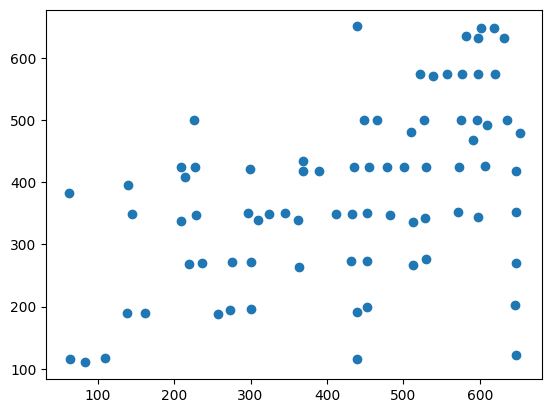

In [348]:
plt.scatter(corners[:,0], corners[:,1])

In [349]:
cv2.imshow('Imagen Original', image)
cv2.imshow('canny', canny)
#cv2.imshow('Imagen Recortada', trimmed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()